Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points      
Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points     
Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points       
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points      
Question 5 - Tesla Stock and Revenue Dashboard - 2 Points       
Question 6 - GameStop Stock and Revenue Dashboard- 2 Points     
Question 7 - Sharing your Assignment Notebook - 2 Points    

In [120]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

## Graph

## Q1

In [29]:
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Q2

In [99]:
url = 'https://stockanalysis.com/stocks/tsla/revenue/'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data)

In [111]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for i in soup.find_all('table')[0].find_all('tr'):
    for k, j in enumerate(i.find_all('td')):
        if k%4 == 0:
            date = j.text
        if k%4 == 1:
            revenue = j.text.replace(',','').replace('$','').replace('K','')
            if "B" in revenue:
                revenue = float(revenue.replace('B','')) * 1000000
            elif "M" in revenue:
                revenue = float(revenue.replace('M','')) * 1000
            else:
                revenue = float(revenue)
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue.sort_values(by='Date', inplace=True)

In [113]:
tesla_revenue.tail()

,Date,Revenue
4,2019-02-02,8290000.0
3,2020-02-01,6470000.0
2,2021-01-30,5090000.0
1,2022-01-29,6010000.0
0,2023-01-28,5930000.0


## Q3

In [114]:
gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Q4

In [115]:
url = 'https://stockanalysis.com/stocks/gme/revenue/'
html_data = requests.get(url).text
soup = BeautifulSoup(html_data)

In [116]:
gamestop_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for i in soup.find_all('table')[0].find_all('tr'):
    for k, j in enumerate(i.find_all('td')):
        if k%4 == 0:
            date = j.text
        if k%4 == 1:
            revenue = j.text.replace(',','').replace('$','').replace('K','')
            if "B" in revenue:
                revenue = float(revenue.replace('B','')) * 1000000
            elif "M" in revenue:
                revenue = float(revenue.replace('M','')) * 1000
            else:
                revenue = float(revenue)
            gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
gamestop_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
gamestop_revenue.sort_values(by='Date', inplace=True)

In [118]:
gamestop_revenue.tail()

,Date,Revenue
4,2019-02-02,8290000.0
3,2020-02-01,6470000.0
2,2021-01-30,5090000.0
1,2022-01-29,6010000.0
0,2023-01-28,5930000.0


## Q5

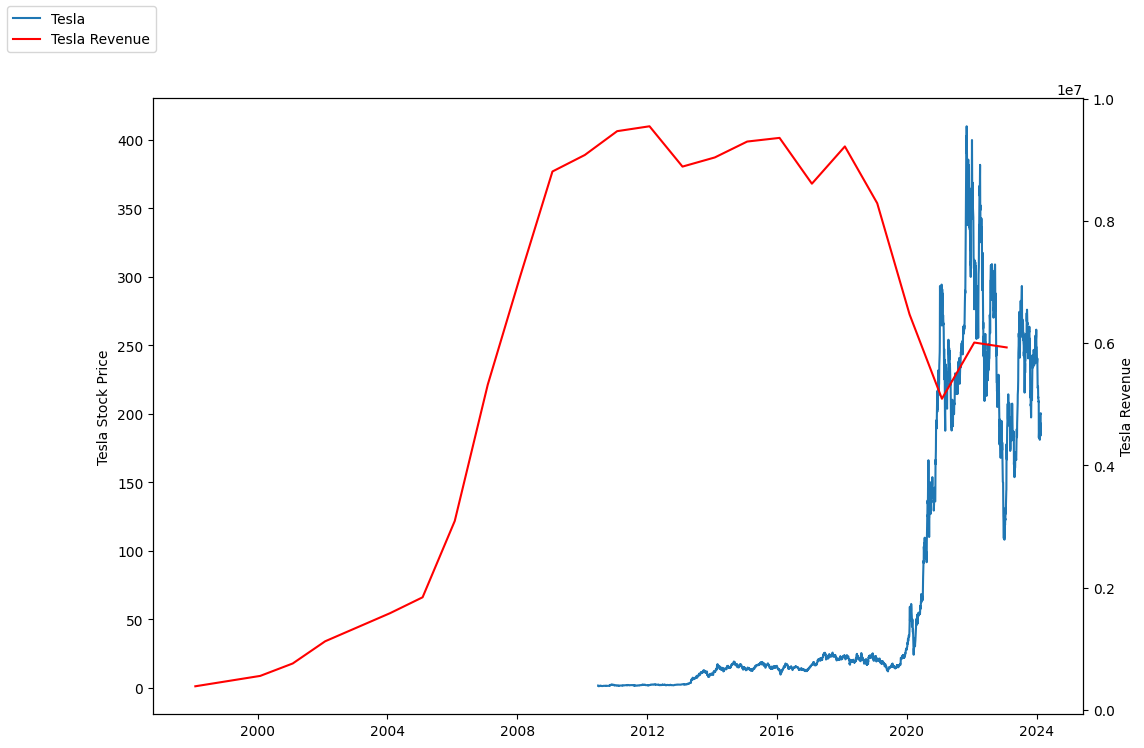

In [124]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(tesla_data['Date'], tesla_data['Close'], label='Tesla')
ax1.set_ylabel('Tesla Stock Price')

ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='red', label='Tesla Revenue')
ax2.set_ylabel('Tesla Revenue')

fig.legend(loc='upper left')
plt.show()


## Q6

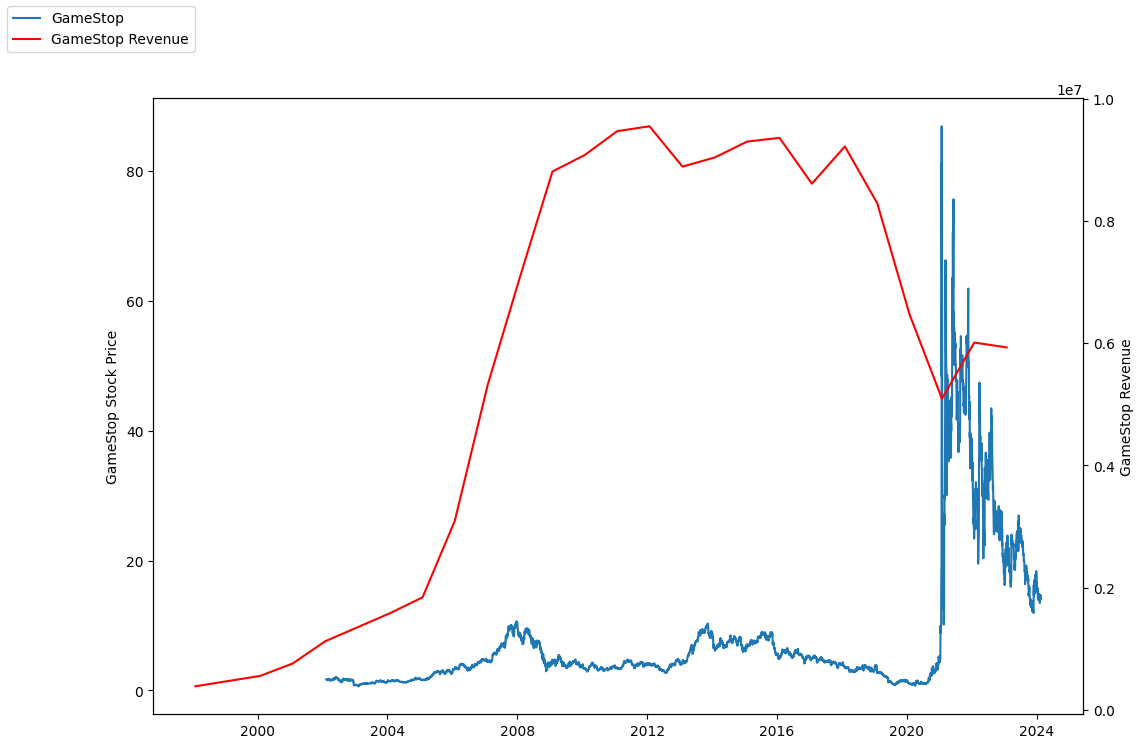

In [125]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(gamestop_data['Date'], gamestop_data['Close'], label='GameStop')
ax1.set_ylabel('GameStop Stock Price')

ax2 = ax1.twinx()
ax2.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'], color='red', label='GameStop Revenue')
ax2.set_ylabel('GameStop Revenue')

fig.legend(loc='upper left')
plt.show()
